# Project: Wrangling and Analyze Data

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. I will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for worthy analyses and visualizations.


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [123]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import datetime
import time
import warnings
import itertools
import requests
import tweepy
import json
import re
import configparser

In [124]:
# settings
base = os.path.abspath("__file__" + "/../")
base
directory = base + '/data/'
directory

'/home/workspace/data/'

In [125]:
#read twitter-archive-enhanced.csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv', sep=',' , encoding='latin-1')
archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [126]:
#exploring ratings
archive_df['text'].str.extract(r"(\d+\.?\d*\/\d+)")

0
0     13/10
1     13/10
2     12/10
3     13/10
4     12/10
5     13/10
6     13/10
7     13/10
8     13/10
9     14/10
10    13/10
11    13/10
12    13/10
13    12/10
14    13/10
15    13/10
16    12/10
17    13/10
18    13/10
19    13/10
20    12/10
21    13/10
22    14/10
23    13/10
24    13/10
25    12/10
26    13/10
27    13/10
28    13/10
29    12/10
...     ...
2326   2/10
2327   7/10
2328   9/10
2329  11/10
2330   6/10
2331   8/10
2332  10/10
2333   9/10
2334   3/10
2335    1/2
2336  11/10
2337  10/10
2338   1/10
2339  11/10
2340   8/10
2341   9/10
2342   6/10
2343  10/10
2344   9/10
2345  10/10
2346   8/10
2347   9/10
2348  10/10
2349   2/10
2350  10/10
2351   5/10
2352   6/10
2353   9/10
2354   7/10
2355   8/10

[2356 rows x 1 columns]

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [127]:
import requests

In [128]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [129]:
filename = res = url.split('/')[-1]

In [130]:
r = requests.get(url)

In [131]:
with open(filename, 'wb') as f:
        f.write(r.content)

In [132]:
#read image_predictions.tsv
image_df = pd.read_csv('image_predictions.tsv',sep = '\t')

In [133]:
image_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [134]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [135]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [136]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [137]:
# get and save tweet data
tweet_url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
tweet_filename = tweet_url.split('/')[-1]
tweet_filepath = tweet_filename #directory +
if not os.path.exists(tweet_filepath):
    print('Downloading tweet data... {}'.format(tweet_filename))
    r = requests.get(tweet_url)
    with open(tweet_filepath, 'wb') as f:
        f.write(r.content)
    print('Tweet data downloaded. {}'.format(tweet_filename))
else:
    print('Tweet data already downloaded. {}'.format(tweet_filename))

Tweet data already downloaded. tweet-json.txt


In [138]:
#length of tweet ids
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [139]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [140]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

In [141]:
#length of retweet counts
retweet_counts = archive_df.retweeted_status_id.values
len(retweet_counts)

2356

In [142]:
# load tweet data into a data frame
tweet_filepath = 'tweet-json.txt' 
tweets = pd.read_json(tweet_filepath, lines=True)

In [143]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for retweeted_status_id in retweet_counts:
        count += 1
        print(str(count) + ": " + str(retweeted_status_id))
end = timer()
return(end - start)
return(fails_dict)

2357: nan
2358: nan
2359: nan
2360: nan
2361: nan
2362: nan
2363: nan
2364: nan
2365: nan
2366: nan
2367: nan
2368: nan
2369: nan
2370: nan
2371: nan
2372: nan
2373: nan
2374: nan
2375: nan
2376: 8.87473957104e+17
2377: nan
2378: nan
2379: nan
2380: nan
2381: nan
2382: nan
2383: nan
2384: nan
2385: nan
2386: nan
2387: nan
2388: nan
2389: 8.86053734421e+17
2390: nan
2391: nan
2392: nan
2393: 8.30583320585e+17
2394: nan
2395: nan
2396: nan
2397: nan
2398: nan
2399: nan
2400: nan
2401: nan
2402: nan
2403: nan
2404: nan
2405: nan
2406: nan
2407: nan
2408: nan
2409: nan
2410: nan
2411: nan
2412: nan
2413: nan
2414: nan
2415: nan
2416: nan
2417: nan
2418: nan
2419: nan
2420: nan
2421: nan
2422: nan
2423: nan
2424: nan
2425: 8.7805761304e+17
2426: nan
2427: nan
2428: nan
2429: nan
2430: 8.78281511006e+17
2431: 6.69000397446e+17
2432: nan
2433: nan
2434: nan
2435: 8.76850772323e+17
2436: nan
2437: nan
2438: nan
2439: nan
2440: nan
2441: nan
2442: nan
2443: nan
2444: nan
2445: nan
2446: nan
244

4700: nan
4701: nan
4702: nan
4703: nan
4704: nan
4705: nan
4706: nan
4707: nan
4708: nan
4709: nan
4710: nan
4711: nan
4712: nan


SyntaxError: 'return' outside function (<ipython-input-143-0443c1616d63>, line 7)

In [144]:
#drop column if not specified
tweets.drop([
    'created_at', 'id_str', 'full_text', 'truncated',
    'display_text_range', 'entities', 'extended_entities', 'source',
    'in_reply_to_status_id', 'in_reply_to_status_id_str',
    'in_reply_to_user_id', 'in_reply_to_user_id_str',
    'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
    'contributors', 'is_quote_status', 'favorited', 'retweeted', 
    'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 
    'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], axis=1, inplace=True)

# rename id column
tweets.rename(columns={'id': 'tweet_id'}, inplace=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Summary of the twitter data frame

In [145]:
#Information about twitter-archive-enhanced dataframe
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [146]:
#Information about twitter prediction dataframe
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [147]:
#Statistical summary for twitter-archive-enhanced dataframe
archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [148]:
#Statistical summary for twitter predictions dataframe
image_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [149]:
#tweets information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [32]:
#Tweets dataframe
tweets.head()

favorite_count            tweet_id  retweet_count
0           39467  892420643555336193           8853
1           33819  892177421306343426           6514
2           25461  891815181378084864           4328
3           42908  891689557279858688           8964
4           41048  891327558926688256           9774

In [33]:
#Statistical summary of tweets dataframe
tweets.describe()

favorite_count      tweet_id  retweet_count
count     2354.000000  2.354000e+03    2354.000000
mean      8080.968564  7.426978e+17    3164.797366
std      11814.771334  6.852812e+16    5284.770364
min          0.000000  6.660209e+17       0.000000
25%       1415.000000  6.783975e+17     624.500000
50%       3603.500000  7.194596e+17    1473.500000
75%      10122.250000  7.993058e+17    3652.000000
max     132810.000000  8.924206e+17   79515.000000

## Checking for duplicate data

In [34]:
# check for duplicate tweets and display in a tuple
archive_df.tweet_id.duplicated().sum(), image_df.tweet_id.duplicated().sum(), tweets.tweet_id.duplicated().sum()

(0, 0, 0)

## Exploring data frame

In [150]:
all_columns = pd.Series(list(archive_df) + list(image_df) + list(tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
30    tweet_id
dtype: object

In [151]:
# numerator
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
# denominator
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
# count dog names
archive_df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Oscar          6
Leo            6
Jax            6
Scout          6
Milo           6
Jack           6
Rusty          6
Dave           6
Bella          6
Koda           6
Stanley        6
very           5
            ... 
Spark          1
Bobble         1
Tonks          1
Sully          1
by             1
Philippe       1
Shikha         1
Gustaf         1
Jim            1
Orion          1
Gert           1
Pip            1
Marlee         1
Comet          1
Scruffers      1
Julius         1
Snicku         1
Napolean       1
Jeffrie        1
General        1
Tiger          1
Rooney         1
Sage           1
Travis         1
Rover          1
Hamrick        1
Durg           1
Cheryl        

In [39]:
# Images that are dogs
image_df.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

### Quality issues
1. The stages of Dogs should be identified as category in the archive table

2. In the archive table, dogs identification is not correct

3. Retweets may capture the same dog twice with different twitter_ids

4. Dog breed names are not written in a consistent format in p1, p2, p3 columns in the image predictions table

5. Rating numerator and denominator have many outliers

6. Source displays url in the archive table

7. Erroneous data type in the archive table (timestamp)

8. Dog names are missing in the archive table

### Tidiness issues
1. Expanded url column in the archive table should contain only one set of url

3. retweet_count and favorite_count should be appended to archive table.

4. jpg_url should be part of archive table.

4. Dog stage columns should be a single column and named as "stage" in the archive table


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [152]:
# Make copies of original pieces of data
archive_data_copy = archive_df.copy()
image_data_copy = image_df.copy()
tweets_data_copy = tweets.copy()

### Issue #1 and #2:

#### Define:
From the archive table, properly identify the correct dog stage.

Create a new column in the archive table called stage that contains the dog stage and drop the current columns doggo, floofer, pupper, puppo.

Addresses the issue of the stage column not being properly identified and the doggo, floofer, pupper, puppo columns into stage column.

#### Code

In [153]:
substring = ['doggo', 'floofer', 'puppo', 'pupper', 'floof']

archive_data_copy['stage'] = archive_data_copy.text.apply(lambda x: substring[0] if x.lower().find(substring[0]) != -1 else substring[1] if x.lower().find(substring[1]) != -1 else substring[2] if x.lower().find(substring[2]) != -1 else substring[3] if x.lower().find(substring[3]) != -1 else substring[4] if x.lower().find(substring[4]) != -1 else '')

# replace floof with floofer in the stage column
archive_data_copy['stage'] = archive_data_copy.stage.str.replace(r'\bfloof\b', 'floofer')

# capitalize each dog stage in the column in the stage column
archive_data_copy['stage'] = archive_data_copy.stage.str.capitalize()

In [154]:
# drop doggo, floofer, puppo, or pupper columns in the archive_data_copy data frame
archive_data_copy.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)

In [155]:
# change dtype of the stage column to category
archive_data_copy.stage = archive_data_copy.stage.astype('category')

#### Test

In [156]:
# create a new column in the archive_data_copy data frame called 'stage'
archive_data_copy.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
262  842765311967449089                    NaN                  NaN   
398  825026590719483904                    NaN                  NaN   
412  822975315408461824                    NaN                  NaN   

                     timestamp  \
262  2017-03-17 15:51:22 +0000   
398  2017-01-27 17:04:02 +0000   
412  2017-01-22 01:12:59 +0000   

                                                source  \
262  <a href="http://twitter.com/download/iphone" r...   
398  <a href="http://twitter.com/download/iphone" r...   
412  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
262  Meet Indie. She's not a fan of baths but she's...                  NaN   
398  Say hello to Pablo. He's one gorgeous puppo. A...                  NaN   
412  This is Albus. He's soaked as h*ck. Seems to h...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
262                       NaN                        NaN   
398                       NaN                        NaN   
412                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
262  https://www.gofundme.com/get-indie-home/,https...                12   
398  https://www.gofundme.com/my-puppys-double-cata...                12   
412  https://twitter.com/dog_rates/status/822975315...                12   

     rating_denominator   name  stage  
262                  10  Indie         
398                  10  Pablo  Puppo  
412                  10  Albus

### Issue #3:

#### Define
Retweets may capture the same dog twice with different twitter_ids.
Drop retweeted and replies columns in the archive table.

#### Code

In [157]:
# drop retweeted and replies columns
archive_data_copy = archive_data_copy.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [158]:
#  check if all retweeted and replies columns are dropped
archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2356 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.8+ KB


### Issue #4:

#### Define
Dog breed names are not written in a consistent format in p1, p2, p3 columns in the image predictions table
>Replace underscore with space using replace() and capitalize each word in the breed name using str.title() in the predictions table.

### Code

In [159]:
# replace underscores with spaces in p1, p2, and p3 columns in the image_data_copy data frame
image_data_copy.p1 = image_data_copy.p1.str.replace('_', ' ')
image_data_copy.p2 = image_data_copy.p2.str.replace('_', ' ')
image_data_copy.p3 = image_data_copy.p3.str.replace('_', ' ')

In [160]:
# capitalize each word in the column in the p1, p2, and p3 columns in the image_data_copy data frame
image_data_copy.p1 = image_data_copy.p1.str.title()
image_data_copy.p2 = image_data_copy.p2.str.title()
image_data_copy.p3 = image_data_copy.p3.str.title()

### Test

In [161]:
image_data_copy.p1.sample(6)

225                 Cairn
853                Borzoi
176                   Pug
948            Guinea Pig
459    Labrador Retriever
231           Maltese Dog
Name: p1, dtype: object

In [162]:
image_data_copy.p2.sample(6)

1561                  Borzoi
343                    Teddy
297                    Tiger
1342    Old English Sheepdog
19               Toy Terrier
452                  Redbone
Name: p2, dtype: object

In [163]:
image_data_copy.p3.sample(6)

195                         Plunger
1603             Labrador Retriever
735     German Short-Haired Pointer
1570                     Toy Poodle
1993                         Kelpie
44                           Vizsla
Name: p3, dtype: object

## Issue #5:

### Define
Rating numerator and denominator have many outliers
>Keep rows where the rating_numerator is between 1 and 14 and the rating_denominator is 10

### Code

In [164]:
# keep rows where the numerator is 1-14 and denominator is 10
archive_data_copy = archive_data_copy[((archive_data_copy.rating_numerator == 1) | (archive_data_copy.rating_numerator == 2) | (archive_data_copy.rating_numerator == 3) | (archive_data_copy.rating_numerator == 4) | (archive_data_copy.rating_numerator == 5) | (archive_data_copy.rating_numerator == 6) | (archive_data_copy.rating_numerator == 7) | (archive_data_copy.rating_numerator == 8) | (archive_data_copy.rating_numerator == 9) | (archive_data_copy.rating_numerator == 10) | (archive_data_copy.rating_numerator == 11) | (archive_data_copy.rating_numerator == 12) | (archive_data_copy.rating_numerator == 13) | (archive_data_copy.rating_numerator == 14)) & (archive_data_copy.rating_denominator == 10)]

### Test

In [165]:
archive_data_copy.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
Name: rating_numerator, dtype: int64

In [166]:
archive_data_copy.rating_denominator.value_counts()

10    2319
Name: rating_denominator, dtype: int64

## Issue #6:

### Define
Source displays url in the archive table
>From the archive table, strip source to remove the HTML links

### Code

In [167]:
# strip 'source' column of link
def strip_html_link(source):
    return source.split('>', 1)[-1][:-4]

# apply function to 'source' column
archive_data_copy['source'] = archive_data_copy['source'].apply(strip_html_link)

### Test

In [168]:
archive_data_copy['source'].value_counts()

Twitter for iPhone     2185
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

## Issue #7:

### Define
Erroneous data type in the archive table (timestamp)
>Convert timestamp to datetime in the archive table

### Code

In [169]:
# convert timestamp to datetime
archive_data_copy.timestamp = pd.to_datetime(archive_data_copy.timestamp)

### Test

In [170]:
archive_data_copy.timestamp.dtypes

dtype('<M8[ns]')

# TIDINESS ISSUES

### Define
Creating one tweet observation table by joining archive_data_copy, image_data_copy, and tweets_data_copy tables

### Code

In [171]:
tweet_table = tweets_data_copy.merge(archive_data_copy, left_on='tweet_id', right_on='tweet_id')

### Test

In [172]:
tweet_table.head()

favorite_count            tweet_id  retweet_count           timestamp  \
0           39467  892420643555336193           8853 2017-08-01 16:23:56   
1           33819  892177421306343426           6514 2017-08-01 00:17:27   
2           25461  891815181378084864           4328 2017-07-31 00:18:03   
3           42908  891689557279858688           8964 2017-07-30 15:58:51   
4           41048  891327558926688256           9774 2017-07-29 16:00:24   

               source                                               text  \
0  Twitter for iPhone  This is Phineas. He's a mystical boy. Only eve...   
1  Twitter for iPhone  This is Tilly. She's just checking pup on you....   
2  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncin...   
3  Twitter for iPhone  This is Darla. She commenced a snooze mid meal...   
4  Twitter for iPhone  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  
0                  10   Phineas        
1                  10     Tilly        
2                  10    Archie        
3                  10     Darla        
4                  10  Franklin

In [173]:
tweet_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 0 to 2316
Data columns (total 11 columns):
favorite_count        2317 non-null int64
tweet_id              2317 non-null int64
retweet_count         2317 non-null int64
timestamp             2317 non-null datetime64[ns]
source                2317 non-null object
text                  2317 non-null object
expanded_urls         2267 non-null object
rating_numerator      2317 non-null int64
rating_denominator    2317 non-null int64
name                  2317 non-null object
stage                 2317 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 201.6+ KB


## Define
Now from image_data_copy we move jpg_url to the tweet_table

## Code

In [174]:
tweet_table = tweet_table.merge(image_data_copy[['tweet_id', 'jpg_url']], left_on='tweet_id', right_on='tweet_id')

In [175]:
image_data_copy.drop('jpg_url', axis=1, inplace=True)

## Test

In [176]:
tweet_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2046
Data columns (total 12 columns):
favorite_count        2047 non-null int64
tweet_id              2047 non-null int64
retweet_count         2047 non-null int64
timestamp             2047 non-null datetime64[ns]
source                2047 non-null object
text                  2047 non-null object
expanded_urls         2047 non-null object
rating_numerator      2047 non-null int64
rating_denominator    2047 non-null int64
name                  2047 non-null object
stage                 2047 non-null category
jpg_url               2047 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 194.1+ KB


In [177]:
image_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


## Define
Merge tweet_table and image_data_copy to create a single tweet observation table
Code

## Code

In [178]:
# melt image_data_copy data frame
breed = pd.melt(image_data_copy, id_vars=['tweet_id'], value_vars=['p1', 'p2', 'p3'], var_name='prediction_no', value_name='breed')

In [179]:
true_pred = pd.melt(image_data_copy, id_vars=['tweet_id'],  value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='dog_no', value_name='dog')

In [180]:
predict_df = breed.merge(true_pred, left_on='tweet_id', right_on='tweet_id')

In [181]:
predict_df = predict_df[predict_df['dog'] == True]

In [182]:
# drop duplicates in predict_df
predict_df = predict_df.drop_duplicates(subset=['tweet_id'])

In [183]:
predict_df = predict_df.filter(['tweet_id', 'breed'])

In [184]:
# merge predict_df with tweet_table
df = tweet_table.merge(predict_df, left_on='tweet_id', right_on='tweet_id')

## Test

In [185]:
df.sample(4)

favorite_count            tweet_id  retweet_count           timestamp  \
1072            2918  695051054296211456            885 2016-02-04 01:07:39   
151            12217  852189679701164033           1741 2017-04-12 16:00:27   
315            10971  818614493328580609           2982 2017-01-10 00:24:38   
323            38260  817423860136083457          17504 2017-01-06 17:33:29   

                  source                                               text  \
1072  Twitter for iPhone  Meet Brian (pronounced "Kirk"). He's not amuse...   
151   Twitter for iPhone  This is Sailor. He has collected the best dirt...   
315   Twitter for iPhone  This is Bear. He's a passionate believer of th...   
323   Twitter for iPhone  This is Ken. His cheeks are magic. 13/10 (IG: ...   

                                          expanded_urls  rating_numerator  \
1072  https://twitter.com/dog_rates/status/695051054...                 6   
151   https://twitter.com/dog_rates/status/852189679...                12   
315   https://twitter.com/dog_rates/status/818614493...                12   
323   https://twitter.com/dog_rates/status/817423860...                13   

      rating_denominator    name stage  \
1072                  10   Brian         
151                   10  Sailor         
315                   10    Bear         
323                   10     Ken         

                                                jpg_url        breed  
1072    https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg  Boston Bull  
151     https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg       Barrow  
315     https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg    Chihuahua  
323   https://pbs.twimg.com/ext_tw_video_thumb/81742...     Ice Bear

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [186]:
# sort columns
df = df.reindex(columns=['tweet_id', 'timestamp', 'name', 'breed', 'stage', 'rating_numerator', 'rating_denominator',  'retweet_count',
       'favorite_count', 'text', 'jpg_url', 'source', 'expanded_urls', 'retweeted_status_id'])

In [187]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [116]:
#Install pandas SQL for visualizations
! pip install -U pandasql

Requirement already up-to-date: pandasql in /opt/conda/lib/python3.6/site-packages (0.7.3)


In [188]:
#Import Sql
from pandasql import sqldf

In [189]:
pysqldf = lambda q: sqldf(q, globals())

### Insights:
1. The most engaging days of the week people tweet is during Monday, Tuesday, Wednesday and Thursday

2. The amount of likes and retweets are increasing over time.

3. Dogs at the doggo and puppo stages received the most likes on average

### Visualization

In [190]:
#timestamp column , convert it to days of the week 
df["timestamp"] = pd.to_datetime(df["timestamp"]).dt.day_name()

In [191]:
#number of tweets for each day of the week
df['timestamp'].value_counts().sort_values(ascending = False)

Monday       289
Tuesday      254
Thursday     251
Wednesday    251
Friday       246
Sunday       222
Saturday     216
Name: timestamp, dtype: int64

### It is clear that most days engaged by people in tweeting is Monday to Wednesday

In [192]:
# Top and least dogs by number of retweets
query = """
SELECT 
    name,
    stage,
    favorite_count AS likes,
    retweet_count AS retweet
FROM (
    SELECT * 
    FROM df
    WHERE name != '' and stage != ''
    ORDER BY retweet_count ASC
    LIMIT 10
    ) AS least
UNION
SELECT 
    name,
    stage,
    favorite_count AS likes,
    retweet_count AS retweet
FROM (
    SELECT * 
    FROM df
    WHERE name != '' and stage != ''
    ORDER BY retweet_count DESC
    LIMIT 10
    ) AS most
"""

pysqldf(query)

name    stage   likes  retweet
0    Albert   Pupper     769      265
1        Bo    Doggo       0    42228
2        Bo    Doggo   95450    42228
3    Jamesy   Pupper  106827    32883
4      Jazz   Pupper     757      137
5    Mollie   Pupper    1057      252
6      None    Doggo   47844    19196
7      None    Doggo   55683    27728
8      None    Doggo   75163    52360
9      None    Doggo  131075    79515
10     None  Floofer    1400      388
11     None  Floofer   33345    18497
12     None   Pupper       0       83
13     None   Pupper    1140      260
14     None   Pupper    1653      328
15     None    Puppo   56413    19669
16     None    Puppo  132810    48265
17    Rufio   Pupper     693      103
18  Schnozz   Pupper    1039      314
19     Zoey   Pupper     344       92

In [193]:
most_dog_stage = """
SELECT stage AS 'Dog Stage', ROUND(AVG(favorite_count), 2) AS 'Average Likes'
FROM tweet_table
WHERE stage != ''
GROUP BY stage
ORDER BY 2 DESC
"""

pysqldf(most_dog_stage)

Dog Stage  Average Likes
0     Puppo       21173.75
1     Doggo       16920.87
2   Floofer        8728.94
3    Pupper        6960.39

In [194]:
# find the average likes by dog stage
dog_stage_likes = df[['stage', 'favorite_count']]
dog_stage_likes = dog_stage_likes.query('stage != ""')
dog_stage_likes = dog_stage_likes.groupby('stage').mean()

x_pos = list(dog_stage_likes.index)
y_pos = list(dog_stage_likes.favorite_count)

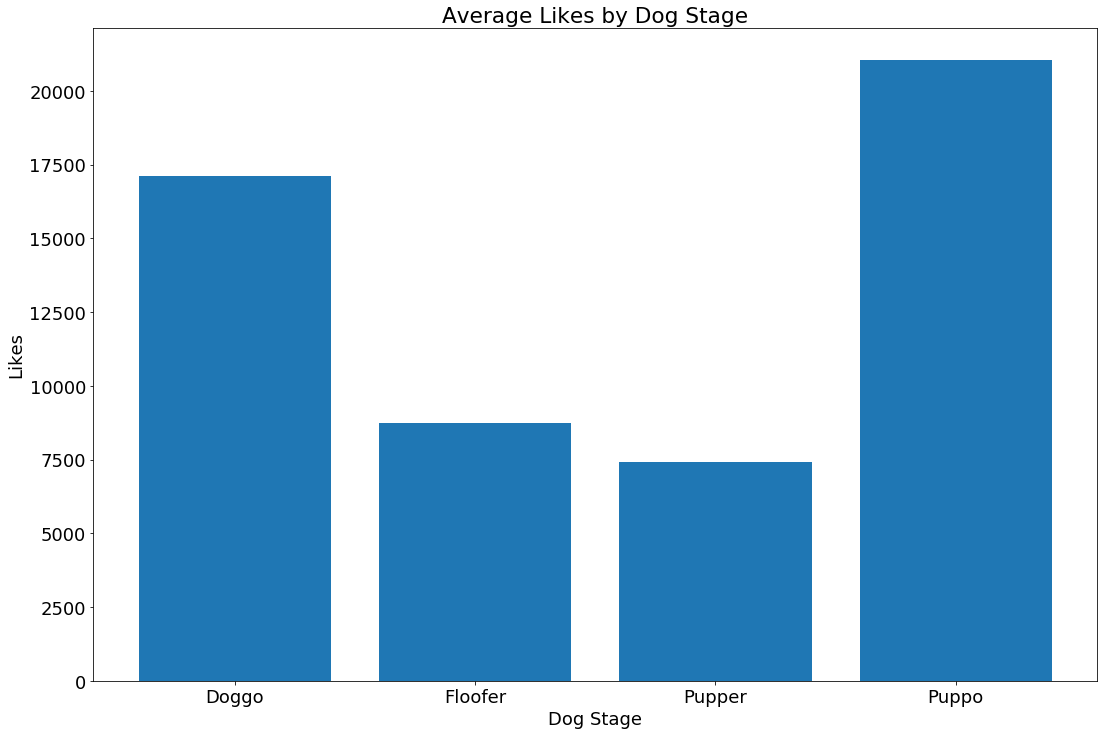

In [195]:
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 18})
plt.title('Average Likes by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Likes')
plt.bar(x_pos, y_pos)
plt.savefig('most_dog_stage');

This histogram shows average likes trend for each Dog Stage
- Here, we can see that Dog stage _Puppo_ has the highest average likes followed by _Doggo_
- That means they both received the most likes on average
- While Floofer and Pupper both recording the least average likes

In [196]:
prediction = """
SELECT 
    name AS 'Dog Name', 
    stage AS 'Dog Stage',
    breed AS 'Predicted Breed'
FROM df
WHERE stage != '' AND name != ''
LIMIT 10;
"""

pysqldf(prediction)

Dog Name Dog Stage     Predicted Breed
0     Cassie     Doggo            Pembroke
1       None     Puppo            Pembroke
2     Stuart     Puppo    Golden Retriever
3       None   Floofer             Samoyed
4     Roscoe    Pupper      French Bulldog
5       Yogi     Doggo     German Shepherd
6  Grizzwald   Floofer                Chow
7        Gus    Pupper  Labrador Retriever
8        Rey   Floofer          Weimaraner
9       Gary    Pupper              Saluki

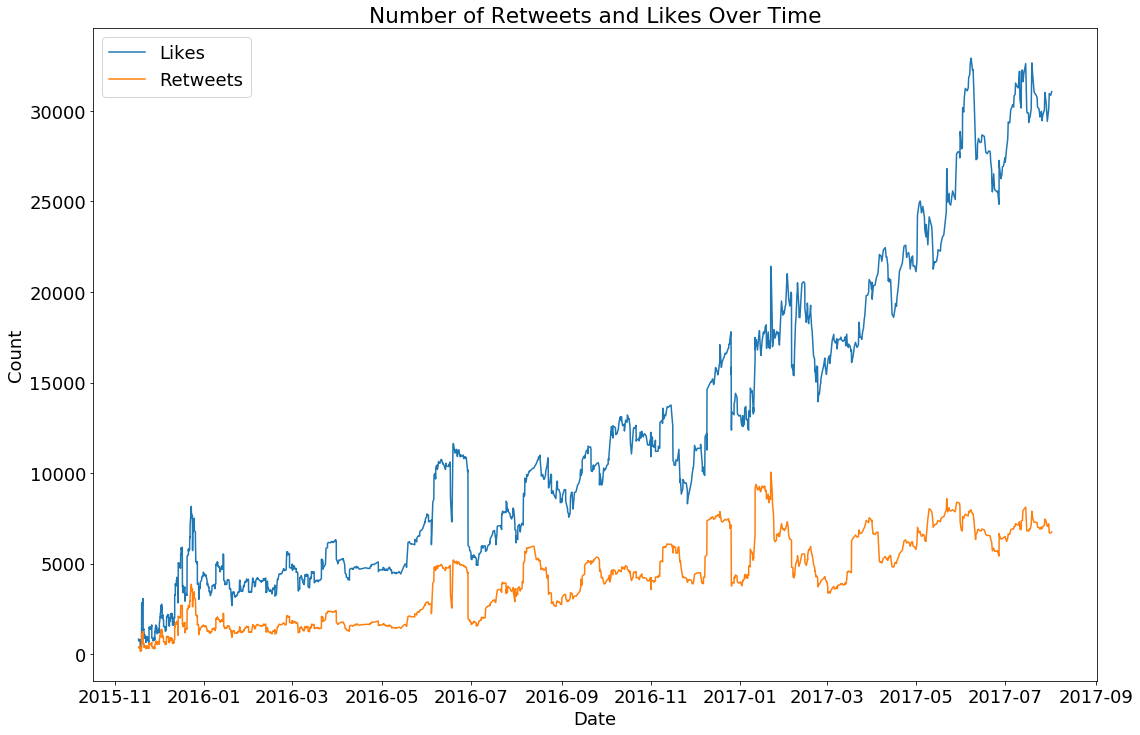

In [197]:
# extract and sort timestamp, favorites, and retweets
engagement = tweet_table[['timestamp', 'favorite_count', 'retweet_count']].sort_values(['timestamp', 'favorite_count'])

# create moving averages
window = 30
rolling_likes = engagement.favorite_count.rolling(window=window).mean()[window-1:]
rolling_retweets = engagement.retweet_count.rolling(window=window).mean()[window-1:]

# plot a line graph
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 18})
plt.title('Number of Retweets and Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(engagement.timestamp[window-1:], rolling_likes, label='Likes')
plt.plot(engagement.timestamp[window-1:], rolling_retweets, label='Retweets')
plt.legend()
plt.savefig('retweets_likes_over_time.png');

This graph shows number of retweets and likes over a given period of time. We can see that most time when the number of retweets goes up or down, number of likes also follows the same path though with lowest count
- The amount of likes and retweets are increasing over time.
- Most people prefer liking than retweeting

# Conclusion

Throughout the data wrangling process I have been able to meet the my goal. I have created interesting and trustworthy analyses and visualizations. I have also documented my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.